### Student Information
Name: VENANT-VALERY Thomas

Student ID: X1085032

GitHub ID: TheLight50

Kaggle name: Thomas Venant-Valery

Kaggle private scoreboard snapshot: 

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here
# Take home exercises

import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

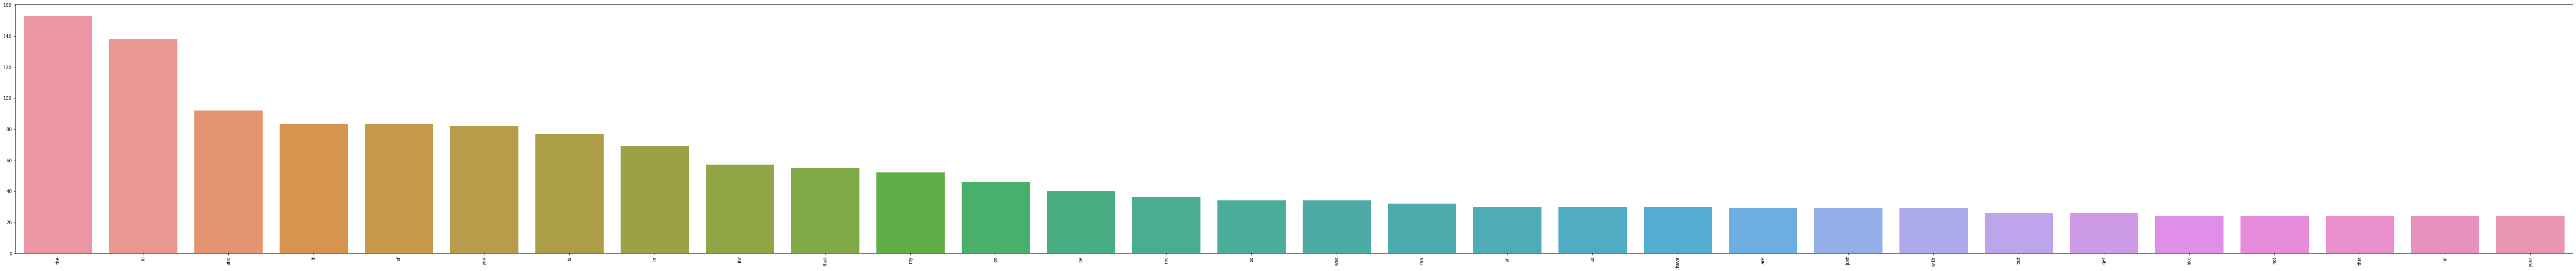

In [8]:
#Ex1

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#test
test_df = test_df.sample(frac=1)

count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df.text)

term_frequencies = []
for j in range(0,test_counts.shape[1]):
    term_frequencies.append(sum(test_counts[:,j].toarray()))
term_frequencies = np.asarray(test_counts.sum(axis=0))[0]

L=[]
for i in count_vect.get_feature_names():
    L.append(i)

for i in range(len(term_frequencies)):
    for j in range(0,len(term_frequencies)-1-i):
        if term_frequencies[j]<term_frequencies[j+1]:
            term_frequencies[j],term_frequencies[j+1]=term_frequencies[j+1],term_frequencies[j]
            L[j],L[j+1]=L[j+1],L[j]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=L[:30], 
            y=term_frequencies[:30])
g.set_xticklabels(L[:30], rotation = 90);

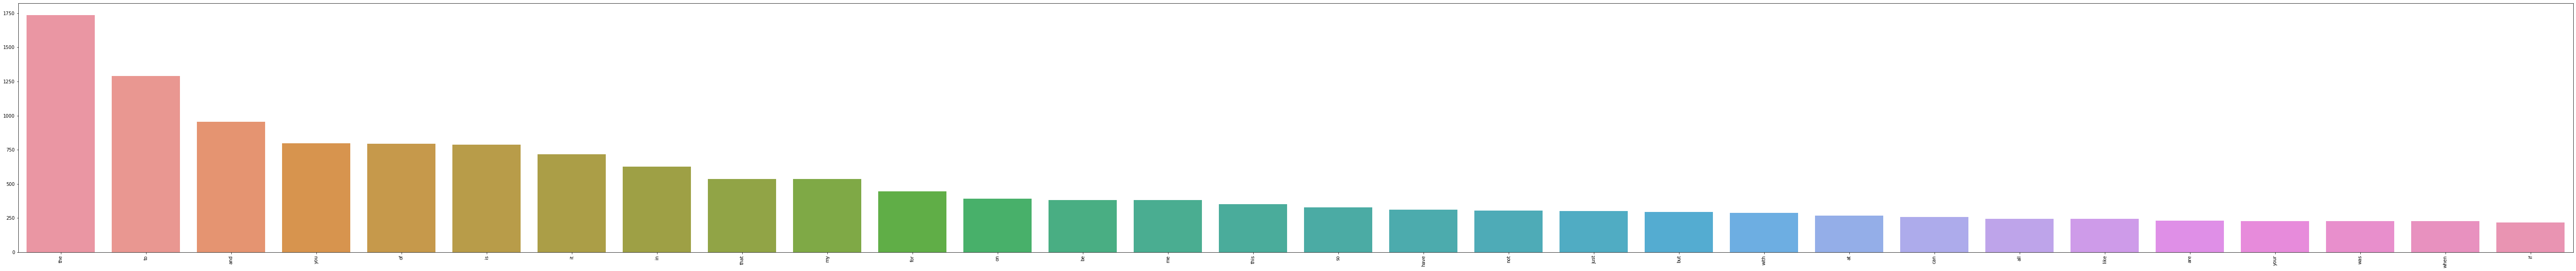

In [9]:
#train
train_df = train_df.sample(frac=1)

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)

term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))
term_frequencies = np.asarray(train_counts.sum(axis=0))[0]

L=[]
for i in count_vect.get_feature_names():
    L.append(i)

for i in range(len(term_frequencies)):
    for j in range(0,len(term_frequencies)-1-i):
        if term_frequencies[j]<term_frequencies[j+1]:
            term_frequencies[j],term_frequencies[j+1]=term_frequencies[j+1],term_frequencies[j]
            L[j],L[j+1]=L[j+1],L[j]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=L[:30], 
            y=term_frequencies[:30])
g.set_xticklabels(L[:30], rotation = 90);

In [10]:
#Ex2

from sklearn.feature_extraction.text import TfidfVectorizer

sample = train_df['text'][:1000]

vectorizer = TfidfVectorizer()
A = vectorizer.fit_transform(sample)

sample[100:110]

2620    @Blancalanka96 thought it'd be fun and it is n...
2119    Good night, Twitter world! Wish you all good s...
3607    #FF @ElizaNealsRocks Love &amp; support, alway...
2745    Dear everyone at HSSU, stop walking with your ...
798          It's easy to hold a grudge harder to let go.
650     doing some testing with my current earth burst...
1965                       @tannerfox awe cnt wait to see
1902    Jorge deserves it, honestly. He's weak.  #90da...
2806    Wanted to get him a cake with sparkling candle...
1038    @twlldun @bbcquestiontime @JacobReesMogg @leic...
Name: text, dtype: object

In [11]:
#Ex3

# This confusion matrix shows the results of our model.
# In the diagonal, we can see the good predictions of the model : the darker the most accurate.
# The other squares show the guessed label and the expected label. These values need to be low to have a good
# model. 
# If we take the example of the fear label, it was guessed right 70/113 times. 16 confusions with anger, 13 with
# joy and 14 with sadness.

In [13]:
#Ex4

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()
B = vectorizer.fit_transform(train_df['text'])

X_train, X_test, Y_train, Y_test = train_test_split(B, train_df['emotion'], test_size=0.25)

clf = MultinomialNB()
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

#Results of 60% to 70% accuracy

0.6393805309734514

In [14]:
#Ex5

# Decision tree results are approximately 64% success whereas Naive Bayes can go up to 70% 

# Decision tree is a discriminative model, naive Bayes is generative.
# Decision tree may neglect some values in training data. So, it may be the cause of an accuracy loss. 
# That's why there is a slight accuracy difference between those models.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.metrics import accuracy_score


In [21]:
import keras
import sklearn

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [22]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 139     anger
186     anger
1664     fear
2120      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [23]:
input_shape = X_train.shape[1]

output_shape = len(label_encoder.classes_)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

In [24]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log1.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 357us/step - loss: 1.3279 - accuracy: 0.3681 - val_loss: 1.2677 - val_accuracy: 0.4496
Epoch 2/25
3613/3613 [==============================] - 0s 133us/step - loss: 0.9790 - accuracy: 0.6538 - val_loss: 0.8993 - val_accuracy: 0.6772
Epoch 3/25
3613/3613 [==============================] - 1s 139us/step - loss: 0.5598 - accuracy: 0.8051 - val_loss: 0.7663 - val_accuracy: 0.7147
Epoch 4/25
3613/3613 [==============================] - 0s 130us/step - loss: 0.4012 - accuracy: 0.8516 - val_loss: 0.7847 - val_accuracy: 0.7320
Epoch 5/25
3613/3613 [==============================] - 0s 127us/step - loss: 0.3195 - accuracy: 0.8846 - val_loss: 0.8114 - val_accuracy: 0.7176
Epoch 6/25
3613/3613 [==============================] - 0s 132us/step - loss: 0.2578 - accuracy: 0.9078 - val_loss: 0.8404 - val_accuracy: 0.7176
Epoch 7/25
3613/3613 [==============================] - 1s 164us/step - loss:

In [25]:
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

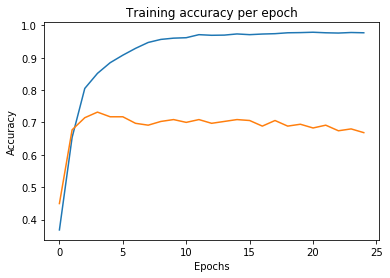

In [26]:
#Ex6

#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log1.csv")
training_log

plt.plot(training_log.epoch, training_log.accuracy)
plt.plot(training_log.epoch, training_log.val_accuracy)
plt.title('Training accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

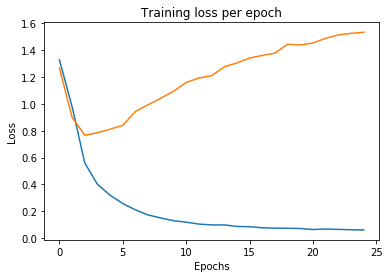

In [27]:
plt.plot(training_log.epoch, training_log.loss)
plt.plot(training_log.epoch, training_log.val_loss)
plt.title('Training loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [28]:
# 1st graph
# Constant accuracy difference

# 2nd graph
# The more the epochs increase, the more the accuracy diffenrece inscreases.

# The closest those curves are from eachother, the best is the model.
# The difference shows under/overfitting (one graph each)

In [29]:
#Ex7

# We want to determine the emotion of a sentence.
# In order to do that, a first thing can be done : study every sentence word by word using w2vect.
# Once we have a trained model, we can compare the words that have a high correlation ratio with the emotions.
# If we do so with every word of each sentence, we should be able to determine the most probable emotion.

In [43]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
139,10139,@ManUtd you have had from me over the years is...,"[@, ManUtd, you, have, had, from, me, over, th..."
186,10186,@RonMexico760 The guy who calls people 'cuck' ...,"[@, RonMexico760, The, guy, who, calls, people..."
1664,20807,The kid at the pool yelling is about to get a ...,"[The, kid, at, the, pool, yelling, is, about, ..."
2120,30116,@RobRiggle @joelmchale @NFLonFOX I still can't...,"[@, RobRiggle, @, joelmchale, @, NFLonFOX, I, ..."
406,10406,Some moving clips on youtube tonight of the vi...,"[Some, moving, clips, on, youtube, tonight, of..."


In [44]:
training_corpus = train_df['text_tokenized'].values

train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [45]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [46]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
#Add limit 
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True, limit=100000)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

In [47]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

In [48]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


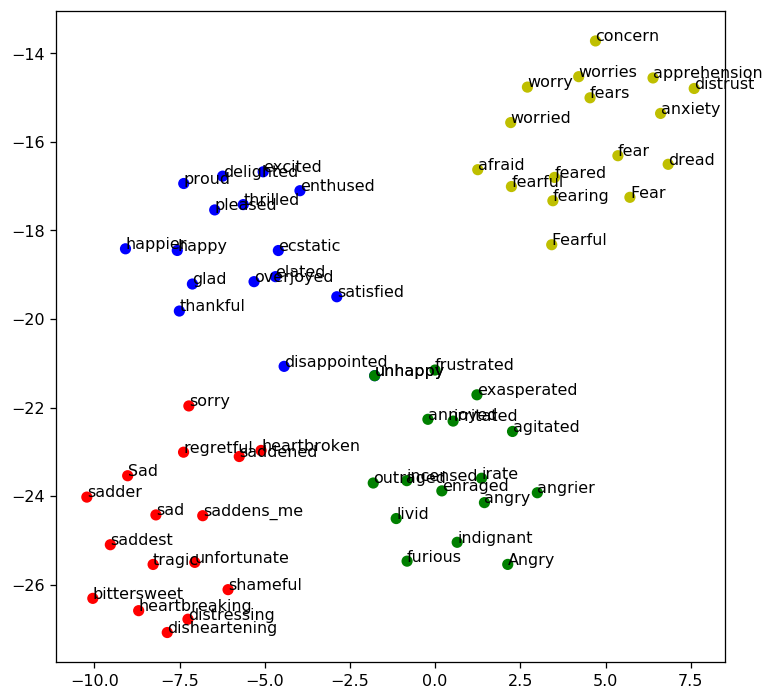

In [51]:
#Ex8

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = w2v_google_model

#15 words for each category = 60 words
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]
target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

size=200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()